In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from MLalgorithms.logistic_regression import LogisticRegresson
%matplotlib inline

Обучаемый параметр логистической регрессии - это вектор $\omega$ размера, совпадающего с числом признаков. При этом модель предсказывает для каждого объекта вероятность принадлежать к классу $1$, равную

$$
    \mathbb{P} (z_i = 1 \mid \omega) = \sigma \left(X_i^{\top} \omega\right) = \frac{1}{1 + \exp{\left(- X_i^{\top} \omega\right)}},
$$

где $z_i$ - предсказание модели для $i$-го объекта, а $X_i$ - вектор признаков для него.

Полагая все объекты независимыми, мы получаем условное распределение выборки $(X, y)$:

$$
    f ((X, y) \mid \omega) = \prod_{i : y_i = 1} \sigma\left(X_i^{\top} \omega\right) \cdot \prod_{i : y_i = 0} \left(1 - \sigma\left(X_i^{\top} \omega\right) \right) = \prod_{i = 1}^n \sigma\left((2 y_i - 1) \cdot X_i^{\top} \omega\right),
$$

поскольку $1 - \sigma (u) = \sigma (-u)$, а преобразование $y \mapsto 2 y - 1$ переводит метки классов из $\{0, 1\}$ в $\{-1, 1\}$.

В таком виде работать с плотностью неудобно - даже при небольшой выборке будут получаться очень маленькие числа. Поэтому лучше работать с логарифмом

$$
    \ln f ((X, y) \mid \omega) = \sum_{i = 1}^n \ln \sigma\left((2 y_i - 1) \cdot X_i^{\top} \omega\right) = \sum_{i = 1}^n \ln \left(1 + \exp{\left( - (2 y_i - 1) X_i^{\top} \omega \right)}\right)
$$

Для реализации алгоритма нам потребуется градиент логарифма условной плотности. Частная производная по $k$-ой компоненте $\omega$ равна

$$
    \frac{\partial f ((X, y) \mid \omega)}{\partial \omega_k} = \frac{\partial}{\partial \omega_k} \sum_{i = 1}^n \ln \left(1 + \exp{\left( - (2 y_i - 1) X_i^{\top} \omega \right)}\right) =
    \sum_{i = 1}^n \frac{\partial}{\partial \omega_k} \ln \left(1 + \exp{\left( - (2 y_i - 1) X_i^{\top} \omega \right)}\right) = \ldots \\
    \ldots = \sum_{i = 1}^n \frac{\exp{\left( - (2 y_i - 1) X_i^{\top} \omega\right)} \cdot (1 - 2 y_i) \dfrac{\partial X_i^{\top} \omega}{\partial \omega_k}}{1 + \exp{\left( - (2 y_i - 1) X_i^{\top} \omega \right)}} =
    \sum_{i = 1}^n \frac{- (2 y_i - 1) X_{ki}}{1 + \exp{\left((2 y_i - 1) X_i^{\top} \omega \right)}}
$$

Собирая всё вместе, мы получаем матричное выражение для градиента (что существенно ускоряет его вычисление):

$$
    \nabla_{\omega} \ln f ((X, y) \mid \omega) = X^{\top} \cdot \left((2 y - 1) \odot \sigma\left( - (2 y - 1) \odot (X \omega) \right) \right),
$$

## Далее я обучу реализованный алгоритм на простом наборе данных из sklearn - "breast_cancer", предварительно его маштабировав. Сами же данные будут разбиты не на train, test, validation, а для простоты на train и test. 

In [2]:
data = load_breast_cancer()
X = data['data']
y = data['target']
# Обязательно нужно маштабировать данные
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [3]:
# Разобьём данные на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 17)

**Не буду подбирать лучше параметры модели, просто объявлю её с параметрами по дефолту.**

In [16]:
logr = LogisticRegresson(lr = 0.001)
history= logr.fit(X_train, y_train)

**Посмотрим на график изменения лос функции**

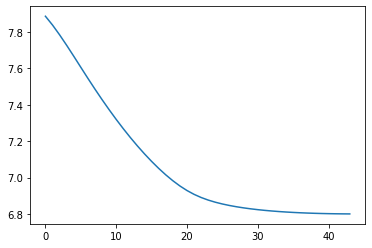

In [18]:
plt.plot(history)

In [19]:
# Предскажем итоговые метки 
y_pred = logr.predict(X_test)

**Посмотрим на метрику качества** 

In [20]:
accuracy_score(y_test, y_pred)

0.965034965034965

**Видно, что алгоритм показал довольно не плохой результат**